**main lip reading model codes for evaluation**

In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, save_model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add, ReLU, BatchNormalization, GlobalAveragePooling2D, Dropout

In [2]:
train_path = r'D:\New folder\7_final_images_60\Train'
test_path = r'D:\New folder\7_final_images_60\Test'
valid_path = r'D:\New folder\7_final_images_60\Validation'

In [92]:
IDG = ImageDataGenerator(rescale = 1/255)

# word_classes = ['bat', 'cup', 'drop', 'eat', 'fish', 'hot', 'jump', 'milk', 'pen', 'red']
word_classes = ['bat', 'cup', 'drop', 'eat']

In [93]:
test = IDG.flow_from_directory(directory=test_path, target_size=(224, 224),
                               classes=word_classes, batch_size=8,
                               class_mode='categorical')
train = IDG.flow_from_directory(directory=train_path, target_size=(224, 224),
                                classes=word_classes, batch_size=8,
                                class_mode='categorical')
valid = IDG.flow_from_directory(directory=valid_path, target_size=(224, 224),
                                classes=word_classes, batch_size=8, shuffle=False,
                                class_mode='categorical')

Found 36 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [29]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     MaxPool2D((2, 2), strides=2),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     MaxPool2D((2, 2), strides=2),
#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     MaxPool2D((2, 2), strides=2),
#     Flatten(),  # Use a reasonable number of neurons
#     Dense(256, activation='tanh'),
#     Dense(128, activation='tanh'),
#     Dense(10, activation='softmax')
# ])
# model.summary()
#
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # save the model
# model.save(r'C:\Users\c3034339\OneDrive - Sheffield Hallam University\Desktop\Project & Dissertation\8. Saved models\model2811_361_216_d130m.h5')

In [136]:
#create the model
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2), strides = 2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(units = 4, activation = 'softmax')
])
# model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Admin\PycharmProjects\pythonProject_1\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
# train the model
history = model.fit(x=train, validation_data=valid, epochs=15, verbose=2)

Epoch 1/15
21/21 - 3s - 154ms/step - accuracy: 0.2024 - loss: 1.4307 - val_accuracy: 0.2500 - val_loss: 1.3869
Epoch 2/15
21/21 - 2s - 116ms/step - accuracy: 0.2381 - loss: 1.3910 - val_accuracy: 0.2500 - val_loss: 1.3795
Epoch 3/15
21/21 - 2s - 116ms/step - accuracy: 0.2381 - loss: 1.3800 - val_accuracy: 0.2778 - val_loss: 1.3589
Epoch 4/15
21/21 - 2s - 116ms/step - accuracy: 0.4524 - loss: 1.3551 - val_accuracy: 0.4444 - val_loss: 1.3432
Epoch 5/15
21/21 - 2s - 115ms/step - accuracy: 0.4464 - loss: 1.3285 - val_accuracy: 0.4722 - val_loss: 1.3144
Epoch 6/15
21/21 - 2s - 116ms/step - accuracy: 0.4524 - loss: 1.2873 - val_accuracy: 0.4722 - val_loss: 1.2783
Epoch 7/15
21/21 - 2s - 115ms/step - accuracy: 0.5536 - loss: 1.2156 - val_accuracy: 0.5556 - val_loss: 1.1993
Epoch 8/15
21/21 - 2s - 115ms/step - accuracy: 0.5476 - loss: 1.1391 - val_accuracy: 0.5278 - val_loss: 1.1555
Epoch 9/15
21/21 - 2s - 116ms/step - accuracy: 0.5595 - loss: 1.0505 - val_accuracy: 0.4722 - val_loss: 1.0704
E

In [34]:
# Evaluate the model on the test data generator
results = model.evaluate(test, verbose=1)

# Print the results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9240 - loss: 0.3090
Test Loss: 0.3568877875804901
Test Accuracy: 0.8333333134651184


In [35]:
# # load the model
# new_model = load_model(r'D:\src_4_pro_dis_2\8. Saved models\lip detection\model2811_361_21_d130_GOOD.h5')
# # new_model.summary()

In [ ]:
# --------------------------------------------------------------------------------------------------------------
# ---------------------------------Evaluations for Lip Reading model--------------------------------------------
# --------------------------------------------------------------------------------------------------------------

**Accuracy and Learning Curve**

In [36]:
test_loss, test_accuracy = model.evaluate(test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 - 0s - 5ms/step - accuracy: 0.8333 - loss: 0.3569
Test Accuracy: 83.33%


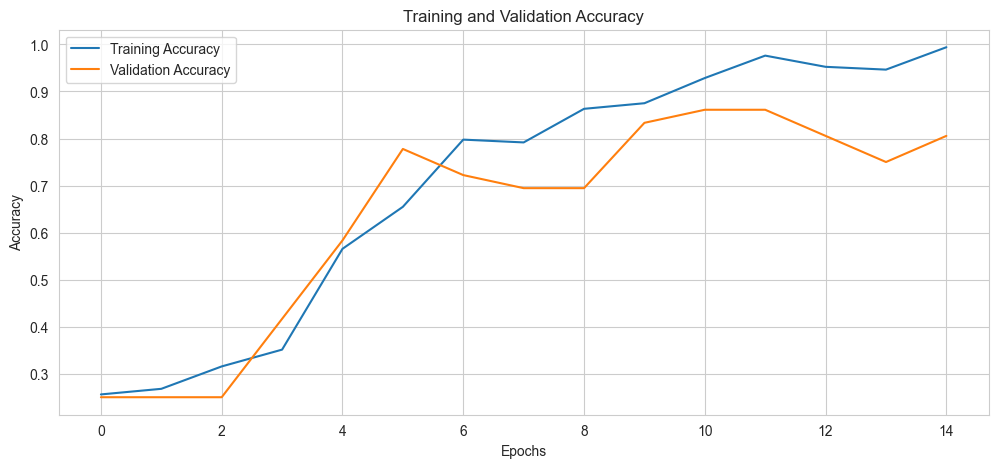

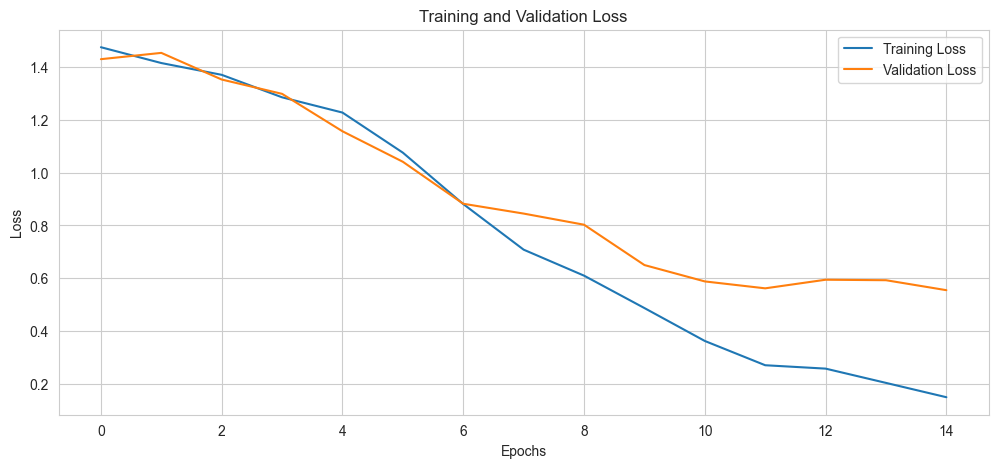

In [135]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Precision, Recall, and F1-Score**

In [143]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import numpy as np

# Step 1: Generate Predictions
y_pred_prob = model.predict(test)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class indices

# Step 2: Get True Labels
y_true = test.classes  # Ground truth labels

# Step 3: Generate Classification Report
report = classification_report(y_true, y_pred, output_dict=True)

# Step 4: Create a PrettyTable
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

# Map class indices to word classes
label_dict = {i: word for i, word in enumerate(word_classes)}

# Step 5: Populate the Table
for label, metrics in report.items():
    if label.isdigit():  # Ensure it's a class label
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

# Step 6: Print the Table
print(table)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|  bat  |    0.36   |  0.56  |   0.43   |   9.0   |
|  cup  |    0.33   |  0.22  |   0.27   |   9.0   |
|  drop |    0.38   |  0.33  |   0.35   |   9.0   |
|  eat  |    0.5    |  0.44  |   0.47   |   9.0   |
+-------+-----------+--------+----------+---------+


**Confusion Matrix**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


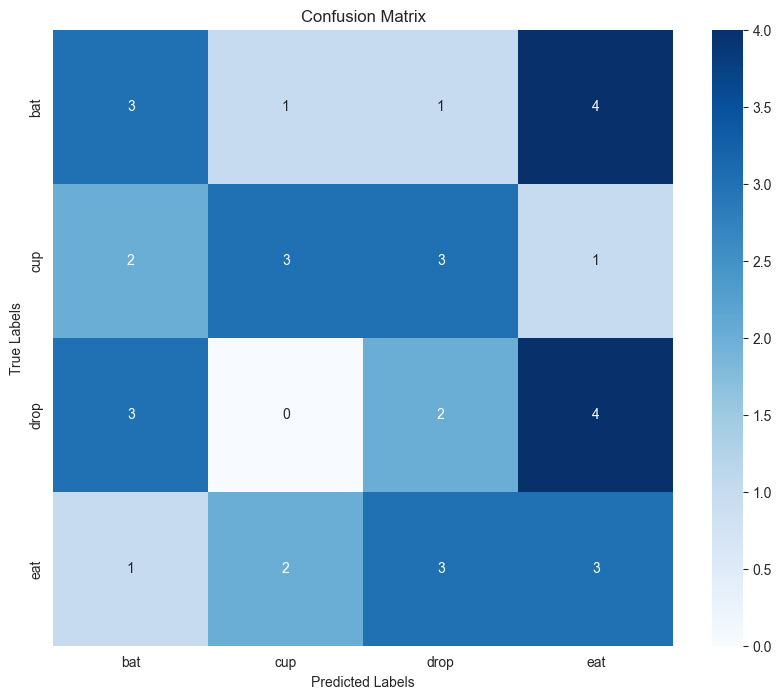

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make Predictions
y_pred = model.predict(test)  # Predict class probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Step 2: Get True Labels
y_true = test.classes  # Ground truth labels from test dataset

# Step 3: Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=word_classes, yticklabels=word_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Word Error Rate (WER)**

In [35]:
import numpy as np
from jiwer import wer, compute_measures
from sklearn.preprocessing import LabelEncoder

# Step 1: Load Test Data
# Ensure you have `test` as your test dataset and `word_classes` as your class labels
# Example: word_classes = ['bat', 'cup', 'drop', 'eat', 'fish', 'hot', 'jump', 'milk', 'pen', 'red']

# Step 2: Generate Predictions
y_pred_prob = model.predict(test)  # Predicted probabilities from the model
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to predicted class indices

# Step 3: Convert Predicted Classes to Words
predicted_sequences = [" ".join([word_classes[i] for i in y_pred_classes])]  # Map indices to words

# Step 4: Extract Ground Truth Labels
y_true = test.classes  # True class indices
ground_truth_sequences = [" ".join([word_classes[i] for i in y_true])]  # Map indices to words

# Step 5: Compute Word Error Rate
word_error_rate = wer(ground_truth_sequences, predicted_sequences)
print(f"Word Error Rate (WER): {word_error_rate:.2f}")

# Step 6: Detailed WER Analysis (Optional)
measures = compute_measures(ground_truth_sequences, predicted_sequences)
print(f"Substitutions: {measures['substitutions']}")
print(f"Deletions: {measures['deletions']}")
print(f"Insertions: {measures['insertions']}")
print(f"Word Error Rate (WER): {measures['wer']:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Word Error Rate (WER): 0.86
Substitutions: 168
Deletions: 2
Insertions: 2
Word Error Rate (WER): 0.86


**Per class accuracy**

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Predict the Classes
y_pred_prob = model.predict(test)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class indices

# Step 2: Get True Labels
y_true = test.classes  # Ground truth labels

# Step 3: Initialize Variables for Per-Class Accuracy
class_accuracies = {}
for class_idx, class_name in enumerate(word_classes):
    # Extract indices of samples belonging to the current class
    indices = np.where(y_true == class_idx)[0]

    # Calculate accuracy for the current class
    true_class_labels = y_true[indices]
    predicted_class_labels = y_pred_classes[indices]
    class_accuracy = accuracy_score(true_class_labels, predicted_class_labels)

    # Store the result
    class_accuracies[class_name] = class_accuracy

# Step 4: Display Per-Class Accuracy
for class_name, accuracy in class_accuracies.items():
    print(f"Class '{class_name}' Accuracy: {accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Class 'bat' Accuracy: 0.00%
Class 'cup' Accuracy: 15.00%
Class 'drop' Accuracy: 15.00%
Class 'eat' Accuracy: 5.00%
Class 'fish' Accuracy: 10.00%
Class 'hot' Accuracy: 0.00%
Class 'jump' Accuracy: 10.00%
Class 'milk' Accuracy: 5.00%
Class 'pen' Accuracy: 10.00%
Class 'red' Accuracy: 10.00%


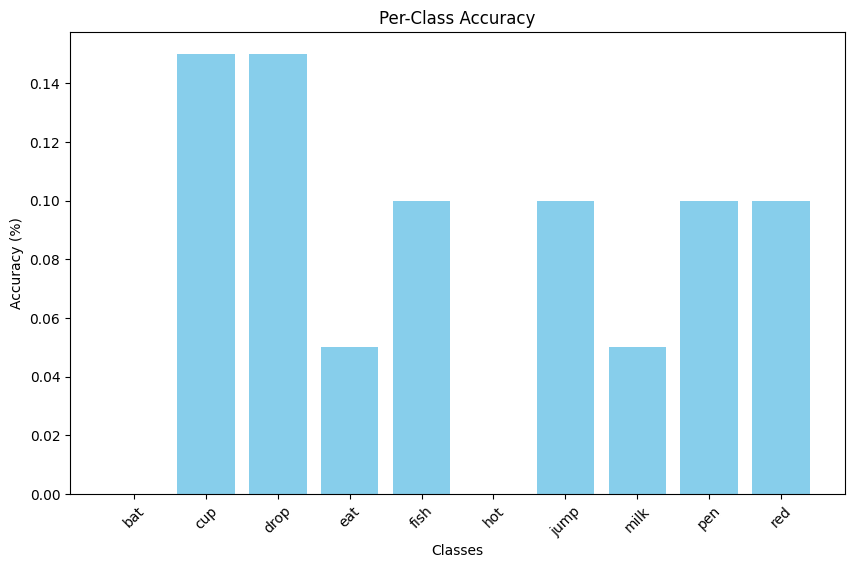

In [37]:
import matplotlib.pyplot as plt

# Plot Per-Class Accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=45)
plt.show()

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

In [1]:
from math import gcd

def calculate_ratio(numbers):
    """
    Calculate the ratio of multiple numbers.
    :param numbers: List of integers.
    :return: Ratio as a string.
    """
    if len(numbers) < 2:
        return "Provide at least two numbers."

    # Calculate the greatest common divisor (GCD) for the numbers
    common_divisor = numbers[0]
    for num in numbers[1:]:
        common_divisor = gcd(common_divisor, num)

    # Divide each number by the GCD to find the simplest ratio
    simplified = [num // common_divisor for num in numbers]

    # Join the ratio components as a string
    return ":".join(map(str, simplified))

# Input: List of numbers directly in the code
numbers = [318,
            203,
            213,
            207,
            164,
            115,
            129,
            280,
            257,
            247,
            528,
            435,
            253,
            178,
            507,
            322,
            250,
            234,
            244,
            232,
            466]  # Replace this list with your numbers

ratio = calculate_ratio(numbers)
print("The ratio is:", ratio)

The ratio is: 318:203:213:207:164:115:129:280:257:247:528:435:253:178:507:322:250:234:244:232:466


In [11]:
from math import gcd

def calculate_ratio(numbers):
    """
    Calculate the ratio of multiple numbers.
    :param numbers: List of integers.
    :return: Ratio as a string.
    """
    if len(numbers) < 2:
        return "Provide at least two numbers."

    # Calculate the greatest common divisor (GCD) for the numbers
    common_divisor = numbers[0]
    for num in numbers[1:]:
        common_divisor = gcd(common_divisor, num)

    # Divide each number by the GCD to find the simplest ratio
    simplified = [num // common_divisor for num in numbers]

    # Join the ratio components as a string
    return simplified

def distribute_in_ratio(total, ratio):
    """
    Distribute a total number into parts based on a given ratio.
    :param total: Total number to be divided.
    :param ratio: List representing the ratio.
    :return: Tuple containing the distribution and the deficit/excess.
    """
    ratio_sum = sum(ratio)

    # Calculate raw distribution using floating-point values
    raw_distribution = [(total * part) / ratio_sum for part in ratio]

    # Round each value to the nearest integer
    rounded_distribution = [round(value) for value in raw_distribution]

    # Calculate the total deficit or excess after rounding
    deficit = total - sum(rounded_distribution)

    # Adjust the distribution to ensure the total matches
    if deficit != 0:
        adjustment_indices = sorted(range(len(ratio)), key=lambda i: raw_distribution[i] - rounded_distribution[i], reverse=(deficit > 0))
        for i in range(abs(deficit)):
            rounded_distribution[adjustment_indices[i % len(ratio)]] += 1 if deficit > 0 else -1

    return rounded_distribution, deficit

# Input: List of numbers directly in the code
numbers = [142,
238,
506,
408,
182,
213]  # Replace this list with your numbers
ratio = calculate_ratio(numbers)
total = 189  # Replace this with your total to distribute

distribution, deficit = distribute_in_ratio(total, ratio)
distribution_total = sum(distribution)
print("The ratio is:", ":".join(map(str, ratio)))
print("The distribution is:", distribution)
print("The actual number is: ", total)
print("The total of the distribution is:", distribution_total)
print("The excess/deficit is:", deficit)

The ratio is: 142:238:506:408:182:213
The distribution is: [16, 27, 56, 46, 20, 24]
The actual number is:  189
The total of the distribution is: 189
The excess/deficit is: -1
